# Voronoi Diagrams

This notebook shows how Voronoi diagrams can be built based on the points of interest. Points of interest (POI) are physical objects on the map, e.g., restaurants, bars, offices, buildings, etc. The POI can be directly used as generators for Voronoi diagrams. Alternatively, if there are many POI, they can be clustered, and the cluster centroids can be used as generators for Voronoi diagrams. The latter is a more typical case.

The POI are retrieved from the richest open-source spatial database in the world, i.e., the OpenStreetMap database. We use top-level POI categories of OSM for retrieving data. A complete list of these categories can be found at [OSM wiki](https://wiki.openstreetmap.org/wiki/Map_features).

To run this notebook, in addition to `tesspy`, you need `contextily` for basemap visualization. This package is only used to enhance visualization and does not affect tessellation.

## Area

As a case study, we use **Hanau**, a city in Hesse, Germany.

In [1]:
from tesspy import Tessellation
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,8)
import contextily as ctx
from time import sleep

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
# Create a tessellation object
hanau=Tessellation('Hanau, Germany')

# get polygon of the investigated area
hanau_polygon = hanau.get_polygon()

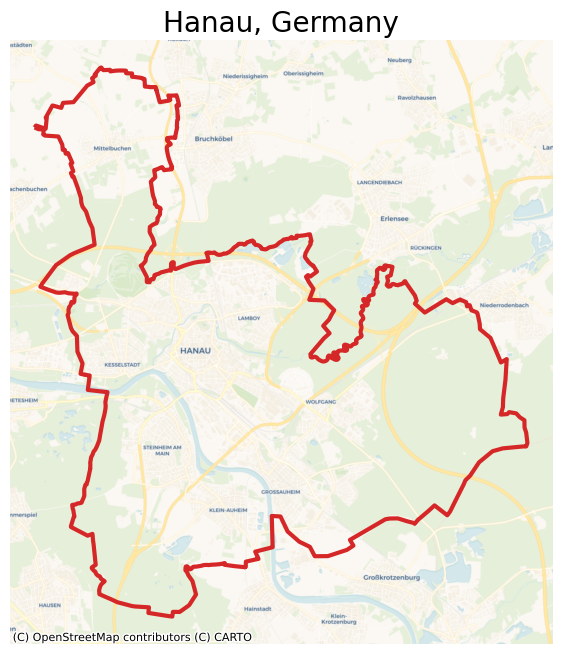

In [4]:
# visualization of area
ax= hanau_polygon.to_crs('EPSG:3857').plot(facecolor='none', edgecolor='tab:red',lw=3)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title('Hanau, Germany', fontsize=20)
plt.show()

## POI Categories

We can specify the desired POI categories by creating a list of them and passing it to the `poi_categories` keyword. We can investigate the possible options by:

In [5]:
hanau.osm_primary_features()

['aerialway',
 'aeroway',
 'amenity',
 'barrier',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'healthcare',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'man_made',
 'military',
 'natural',
 'office',
 'place',
 'power',
 'public_transport',
 'railway',
 'route',
 'shop',
 'sport',
 'telecom',
 'tourism',
 'water',
 'waterway']

For example, we can select `office`, and `amenity`.

In [6]:
hanau_vor = hanau.voronoi(n_polygons=500, poi_categories=["office","amenity"])

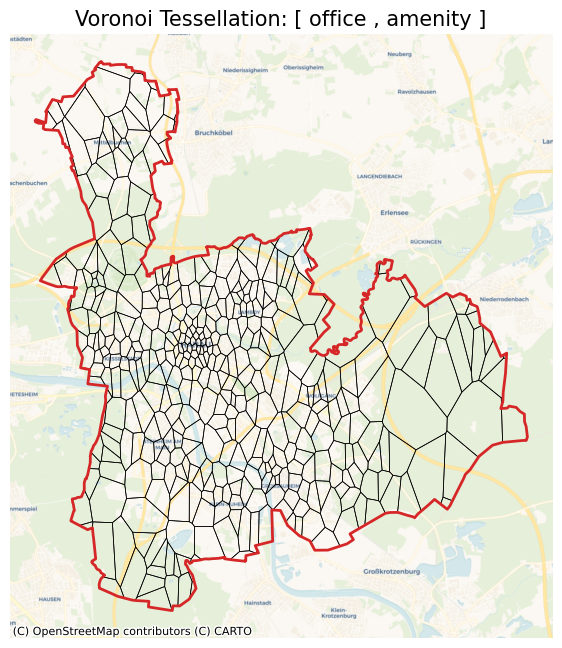

In [7]:
ax= hanau_vor.to_crs('EPSG:3857').plot(facecolor='none', edgecolor='k', lw=0.5)
hanau_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='tab:red',lw=2)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title('Voronoi Tessellation: [ office , amenity ]', fontsize=15)
plt.show()

We can build other Voronoi diagrams with different POI categories. For example, with `shop`, `leisure`, and `amenity`. Please note, the `amenity` POI are already retrieved from the last request and saved in the object. This request retrieves only `shop` and `leisure` data from the OSM.

In [8]:
hanau_vor = hanau.voronoi(n_polygons=500, poi_categories=["shop","leisure","amenity"])

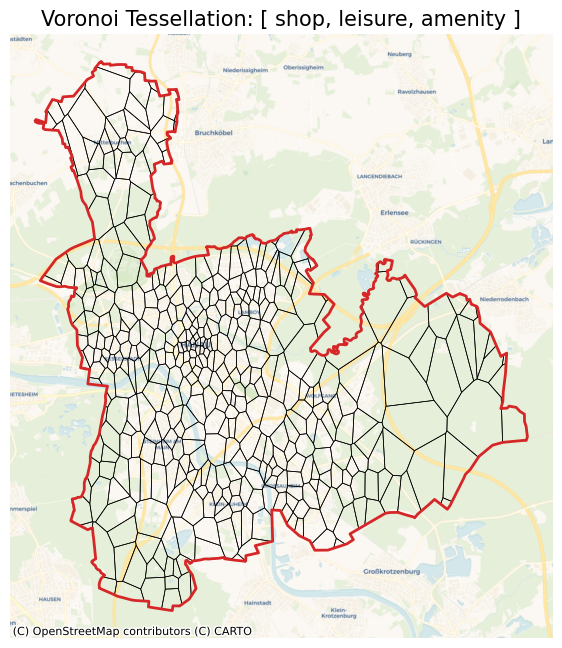

In [9]:
ax= hanau_vor.to_crs('EPSG:3857').plot(facecolor='none', edgecolor='k', lw=0.5)
hanau_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='tab:red',lw=2)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title('Voronoi Tessellation: [ shop, leisure, amenity ]', fontsize=15)
plt.show()

If we set POI categories as `all`, all the POI are retrieved from the OSM. It is recommended to do this initially so that all POI data are retrieved and saved in the object. After that, we can play around with poi_categories, the number of polygons, and the clustering algorithm without sending a request to OSM. This makes the whole process faster as it avoids multiple requests. This way, we could also prevent consequent requests on OSM that may result in a Runtime error for overloading the server.

Getting all the POI data can take a few minutes. Therefore, we set the verbose to `True` to track the process.

In [10]:
sleep(180)
hanau_vor = hanau.voronoi(n_polygons=500, poi_categories='all', verbose=True)

Getting data from OSM...


RuntimeError: 504 Gateway Timeout:
the server has already so much load that the request cannot be executed.Please try again later

In [ ]:
ax= hanau_vor.to_crs('EPSG:3857').plot(facecolor='none', edgecolor='k', lw=0.5)
hanau_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='tab:red',lw=2)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title('Voronoi Tessellation: All POI Categories', fontsize=15)
plt.show()

All the POI are now collected and saved in the Tessellation object. We can call the POI data by:

In [ ]:
hanau_poi_data = hanau.get_poi_data()
hanau_poi_data.head()

We can now test different Voronoi tessellations with different POI categories without having to get data again from the OSM. We create 1000 Voronoi polygons with all the POI data again. As can be seen by verbose, data collection is skipped.

In [ ]:
hanau_vor = hanau.voronoi(n_polygons=1000, poi_categories='all', verbose=True)

In [ ]:
ax= hanau_vor.to_crs('EPSG:3857').plot(facecolor='none', edgecolor='k', lw=0.5)
hanau_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='tab:red',lw=2)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title('Voronoi Tessellation: All POI Categories', fontsize=15)
plt.show()

## Number of Polygons


Voronoi polygons need a list of generators to be built. The number of polygons is the number of generators. Please note that the keyword `n_polygons` is an approximate number. In order to have more accurate results, always a bigger area (buffered area) than the investigated area is analyzed. The reason is to have reasonable polygons on the borders.

The final number of created Voronoi polygons is usually smaller than `n_polygons`. We can play around with the number to get the desired results.

Let's create 100, 500, and 1000 polygons using only `building`s. 

In [ ]:
hanau_vor_100_buildings  = hanau.voronoi(n_polygons=100,  poi_categories=['building'])
hanau_vor_500_buildings  = hanau.voronoi(n_polygons=500,  poi_categories=['building'])
hanau_vor_1000_buildings = hanau.voronoi(n_polygons=1000, poi_categories=['building'])

In [ ]:
fig, axs= plt.subplots(1,3 , figsize=(15,6))

hanau_vor_100_buildings.to_crs('EPSG:3857').plot(ax=axs[0], facecolor='none', edgecolor='k', lw=0.5)
hanau_vor_500_buildings.to_crs('EPSG:3857').plot(ax=axs[1], facecolor='none', edgecolor='k', lw=0.5)
hanau_vor_1000_buildings.to_crs('EPSG:3857').plot(ax=axs[2], facecolor='none', edgecolor='k', lw=0.5)

axs[0].set_title(f'Number of polygons: {len(hanau_vor_100_buildings)}')
axs[1].set_title(f'Number of polygons: {len(hanau_vor_500_buildings)}')
axs[2].set_title(f'Number of polygons: {len(hanau_vor_1000_buildings)}')

for ax in axs.flatten():
    ax.set_axis_off()
    ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
    hanau_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='tab:red',lw=2)
    
plt.tight_layout()

## Clustering Algorithms

The Voronoi generators can be directly set as the POI coordinates. This can be done by setting the `cluster_algo` to `None`. For example, we can create Voronoi polygons with `leisure` as generators. 

In [ ]:
hanau_vor_leisure  = hanau.voronoi(cluster_algo=None,  poi_categories=['leisure'])

In [ ]:
ax= hanau_vor.to_crs('EPSG:3857').plot(facecolor='none', edgecolor='k', lw=0.5)
hanau_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='tab:red',lw=2)
ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()
ax.set_title(f'Voronoi Tessellation: Leisure (No Clustering)\nNumber of Polygons: {len(hanau_vor_leisure)}', fontsize=15)
plt.show()

Since there are usually many POI, we cluster the POI and use the cluster centroids as genrators. There are currently two clustering algorithms implemented. The first and robust one is `K-Means`. The second one is `hdbscan` which is still under test. For `K-Means` clustering, we set the `n_polygons` (`min_cluster_size` is ignored). For `hdbscan` we set the `min_cluster_size` (`n_polygons` is ignored).

In [ ]:
hanau_vor_kmeans  = hanau.voronoi(cluster_algo='k-means', n_polygons=500,  poi_categories=['building'])
hanau_vor_hdbscan  = hanau.voronoi(cluster_algo='hdbscan', min_cluster_size=7,  poi_categories=['building'])

In [ ]:
fig, axs= plt.subplots(1,2 , figsize=(10,6))

hanau_vor_kmeans.to_crs('EPSG:3857').plot(ax=axs[0], facecolor='none', edgecolor='k', lw=0.5)
hanau_vor_hdbscan.to_crs('EPSG:3857').plot(ax=axs[1], facecolor='none', edgecolor='k', lw=0.5)

axs[0].set_title(f'Clustering Algorithm: K-Means')
axs[1].set_title(f'Clustering Algorithm: HDBSCAN')

for ax in axs.flatten():
    ax.set_axis_off()
    ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
    hanau_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='tab:red',lw=2)
    
plt.tight_layout()